In [152]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [153]:
# Read dataset
df = pd.read_csv('dataset_capstone1.csv', delimiter=";")
df

,Dateline (hari),Tingkat Important,Tingkat Urgent,Kompleksitas,Prioritas
0,0,important,urgent,tinggi,do it now
1,0,important,not urgent,tinggi,schedule
2,0,not important,urgent,tinggi,delegate
3,0,not important,not urgent,tinggi,drop
4,0,important,urgent,sedang,do it now
...,...,...,...,...,...
1311,1,important,urgent,rendah,drop
1312,0,important,urgent,rendah,drop
1313,1,important,urgent,rendah,drop
1314,0,important,urgent,rendah,drop


In [154]:
# Kamus untuk penerjemahan teks ke angka
translation_table = {'important': 0, 'not important': 1}
translation_table2 = {'urgent': 0, 'not urgent': 1}
translation_table3 = {'rendah': 0, 'sedang': 1, 'tinggi': 2}

# Menggunakan metode map untuk penerjemahan
df['Tingkat Important'] = df['Tingkat Important'].replace(translation_table)
df['Tingkat Urgent'] = df['Tingkat Urgent'].replace(translation_table2)
df['Kompleksitas'] = df['Kompleksitas'].replace(translation_table3)

In [155]:
df

,Dateline (hari),Tingkat Important,Tingkat Urgent,Kompleksitas,Prioritas
0,0,0,0,2,do it now
1,0,0,1,2,schedule
2,0,1,0,2,delegate
3,0,1,1,2,drop
4,0,0,0,1,do it now
...,...,...,...,...,...
1311,1,0,0,0,drop
1312,0,0,0,0,drop
1313,1,0,0,0,drop
1314,0,0,0,0,drop


In [156]:
feature =  df.drop(['Prioritas'],axis=1)
target = df['Prioritas'].values

In [157]:
# Encode target data using LabelEncoder
label_encoder = LabelEncoder()
target_data_encoded = label_encoder.fit_transform(target)

# Perform one-hot encoding on the encoded target data
target_data_encoded_onehot = tf.keras.utils.to_categorical(target_data_encoded, num_classes=4)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, target_data_encoded_onehot, test_size=0.3, random_state=42)

# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, input_dim=4, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=8, verbose=1)

# Predict on the test data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
predicted_y = np.argmax(y_test, axis=1)

# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predicted_labels)
y_target = label_encoder.inverse_transform(predicted_y)

# Generate classification report
report = classification_report(y_target, predicted_labels_decoded)
print("Classification Report:")
print(report)

Epoch 1/20
116/116 [==============================] - 2s 4ms/step - loss: 1.1976 - accuracy: 0.4517
Epoch 2/20
116/116 [==============================] - 1s 5ms/step - loss: 1.0611 - accuracy: 0.5320
Epoch 3/20
116/116 [==============================] - 1s 5ms/step - loss: 0.9479 - accuracy: 0.6580
Epoch 4/20
116/116 [==============================] - 1s 5ms/step - loss: 0.8611 - accuracy: 0.6830
Epoch 5/20
116/116 [==============================] - 1s 5ms/step - loss: 0.7745 - accuracy: 0.7492
Epoch 6/20
116/116 [==============================] - 0s 3ms/step - loss: 0.7086 - accuracy: 0.7828
Epoch 7/20
116/116 [==============================] - 0s 3ms/step - loss: 0.6468 - accuracy: 0.8143
Epoch 8/20
116/116 [==============================] - 0s 3ms/step - loss: 0.5981 - accuracy: 0.8436
Epoch 9/20
116/116 [==============================] - 0s 3ms/step - loss: 0.5420 - accuracy: 0.8578
Epoch 10/20
116/116 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8523

In [158]:
# Calculate accuracy
accuracy = accuracy_score(y_target, predicted_labels_decoded)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 97.72%


In [159]:
# Generate classification report
report = classification_report(y_target, predicted_labels_decoded)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    delegate       1.00      0.99      1.00       111
   do it now       0.83      1.00      0.91        40
        drop       0.99      0.91      0.95        94
    schedule       1.00      1.00      1.00       150

    accuracy                           0.98       395
   macro avg       0.96      0.98      0.96       395
weighted avg       0.98      0.98      0.98       395



In [160]:
# Compute confusion matrix
cm = confusion_matrix(y_target, predicted_labels_decoded)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[110   0   1   0]
 [  0  40   0   0]
 [  0   8  86   0]
 [  0   0   0 150]]


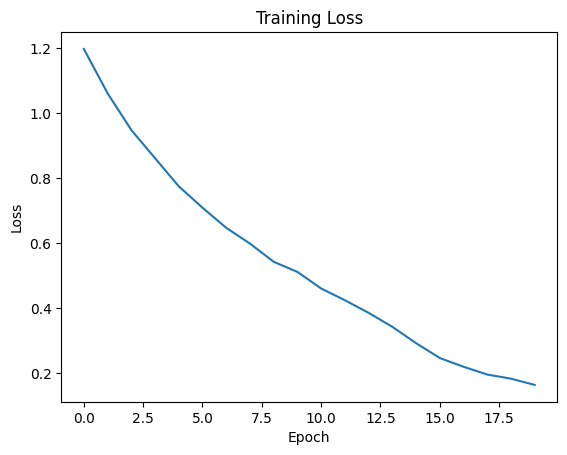

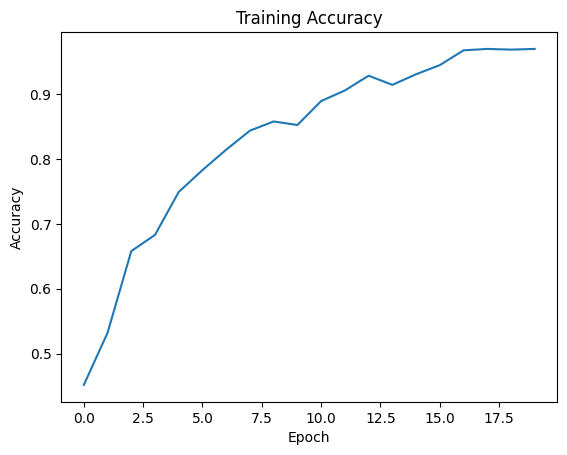

In [161]:
# Plot the training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [162]:
model.save("model.h5")

In [163]:
loaded_model = tf.keras.models.load_model("model.h5")

In [164]:
input_data = [[48,0,1,2], [53,1,0,0], [0,0,0,0], [0,1,1,0],[0,0,1,2],[0,1,0,2],[1,0,0,1], [11,0,0,1], [10,1,1,2]]

In [165]:
predictions = loaded_model.predict(input_data)

1/1 [==============================] - 0s 70ms/step


In [166]:
predicted_labels = np.argmax(predictions, axis=1)

# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predicted_labels)

In [167]:
for i, predicted_labels_decoded in enumerate(predicted_labels_decoded):
    print("Input Data", i+1)
    print("Prediction:", predicted_labels_decoded)
    print()

Input Data 1
Prediction: schedule

Input Data 2
Prediction: delegate

Input Data 3
Prediction: do it now

Input Data 4
Prediction: drop

Input Data 5
Prediction: do it now

Input Data 6
Prediction: delegate

Input Data 7
Prediction: do it now

Input Data 8
Prediction: schedule

Input Data 9
Prediction: drop

